C:\Users\maria\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


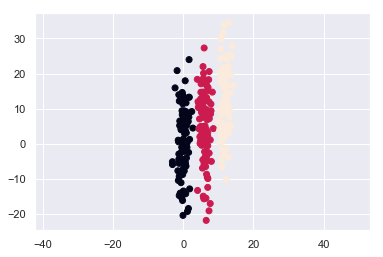

In [1]:
# Define some points in 3 clusters and plot them
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
# Set up the hyper-parameters
max_iterations = 5000
k = 3

points = np.vstack(((np.random.multivariate_normal([0, 0], [[1, 0], [0, 100]] , 100)),
                  (np.random.multivariate_normal([6, 6], [[1, 0], [0, 100]] , 100)),
                  (np.random.multivariate_normal([12, 12], [[1, 0], [0, 100]] , 100))))
true_class_colors = np.hstack((np.ones(100),np.ones(100)*2,np.ones(100)*3))

plt.scatter(points[:, 0], points[:, 1],c=true_class_colors)
plt.axes().set_aspect('equal', 'datalim')

In [13]:
points.shape

(300, 2)

C:\Users\maria\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


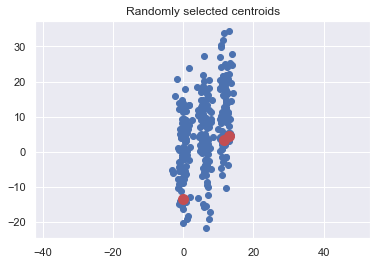

In [2]:
# Choose k random points from the set to be our starting "centroids"
def get_random_centroids(points,number):
    return points[np.random.permutation(len(points))[0:number]]

centroids = get_random_centroids(points,k)
plt.scatter(points[:, 0], points[:, 1])
plt.axes().set_aspect('equal', 'datalim')
plt.title('Randomly selected centroids')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

# Plotting the original randomly selected centroids

In [3]:
centroids

array([[ 11.68531006,   3.46677593],
       [ 13.13847431,   4.42267822],
       [  0.09285041, -13.45648528]])

In [4]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

def get_nearest_centroid_for_all_points(points,centroids):
    clusters = np.zeros(len(points))
    for i in range(len(points)):
        distances = dist(points[i], centroids)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    return clusters
'''
print(get_nearest_centroid_for_all_points(points,centroids))
closest = get_nearest_centroid_for_all_points(points,centroids)

# closest above: the nearest centroid for each point p_i

plt.scatter(points[:, 0], points[:, 1],c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)    
plt.axes().set_aspect('equal', 'datalim')
plt.title('Starting configuration of k-Means')
plt.show()
'''

"\nprint(get_nearest_centroid_for_all_points(points,centroids))\nclosest = get_nearest_centroid_for_all_points(points,centroids)\n\n# closest above: the nearest centroid for each point p_i\n\nplt.scatter(points[:, 0], points[:, 1],c=closest)\nplt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)    \nplt.axes().set_aspect('equal', 'datalim')\nplt.title('Starting configuration of k-Means')\nplt.show()\n"

In [5]:
centroids.shape

(3, 2)

In [6]:
closest = get_nearest_centroid_for_all_points(points,centroids)

In [7]:
centroids

array([[ 11.68531006,   3.46677593],
       [ 13.13847431,   4.42267822],
       [  0.09285041, -13.45648528]])

In [8]:
# Recalculate the centroids for each cluster based on the points that were added
# to it.
def move_centroids(points,closest,centroids):
    print(centroids.shape[0])
    for k in range(centroids.shape[0]):
        cluster = points[closest==k]
        centroids[k] = cluster.mean(axis=0)
    return centroids
'''
new_centroids = move_centroids(points,closest,centroids)
print(new_centroids)
plt.scatter(points[:, 0], points[:, 1],c=closest)
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='r', s=100)    
plt.axes().set_aspect('equal', 'datalim')
plt.title('New centroids for iteration 1')
plt.show()
'''

"\nnew_centroids = move_centroids(points,closest,centroids)\nprint(new_centroids)\nplt.scatter(points[:, 0], points[:, 1],c=closest)\nplt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='r', s=100)    \nplt.axes().set_aspect('equal', 'datalim')\nplt.title('New centroids for iteration 1')\nplt.show()\n"

In [9]:
centro1 = move_centroids(points,closest,centroids)

3


In [10]:
centro1

array([[ 4.7341124 ,  5.00768989],
       [10.77975209, 16.38104904],
       [ 1.61690953, -9.52525116]])

[[ 4.7341124   5.00768989]
 [10.77975209 16.38104904]
 [ 1.61690953 -9.52525116]]


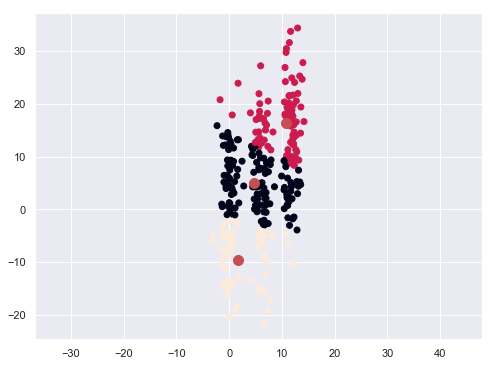

3
[[ 5.09414289  5.00553168]
 [ 9.99445449 17.2767013 ]
 [ 2.37055833 -9.07584168]]


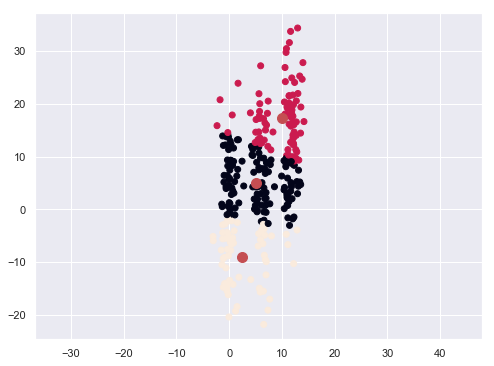

3
[[ 5.34920642  5.22100925]
 [ 9.68905252 17.76386265]
 [ 2.64182714 -8.8245688 ]]


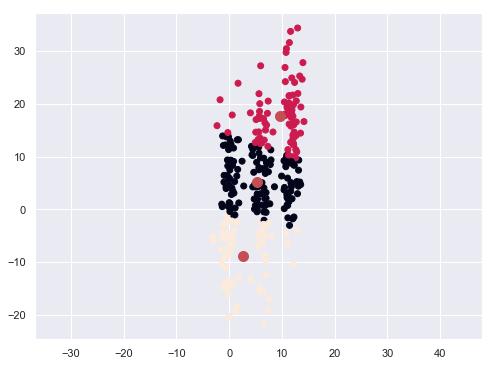

3
[[ 5.61608234  5.47588758]
 [ 9.48188904 18.1820517 ]
 [ 2.71297835 -8.54279681]]


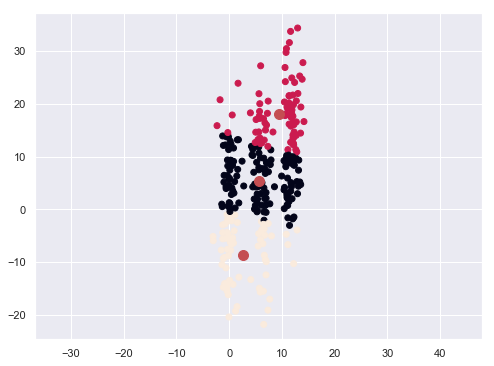

3
[[ 5.8191198   5.662022  ]
 [ 9.38995308 18.47969684]
 [ 2.65841861 -8.34104031]]


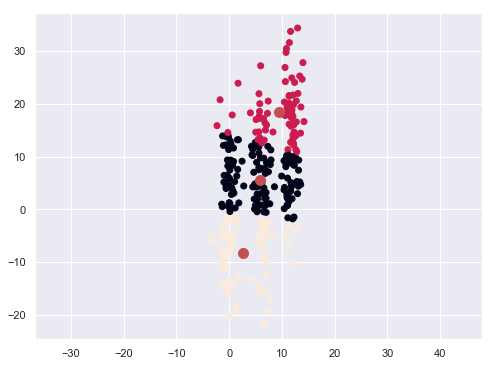

3
[[ 5.73812319  5.97336119]
 [ 9.64096008 18.76809138]
 [ 2.82427183 -8.18989918]]


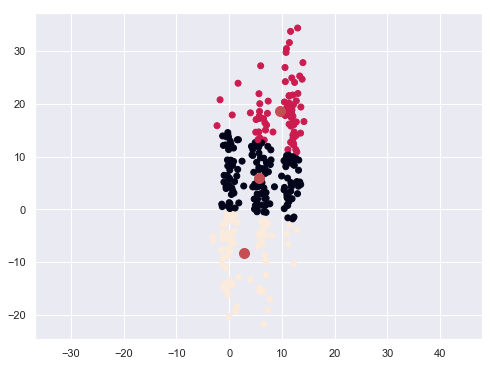

3
[[ 5.73850749  6.12173172]
 [ 9.81641277 18.9034057 ]
 [ 2.7900284  -8.08981283]]


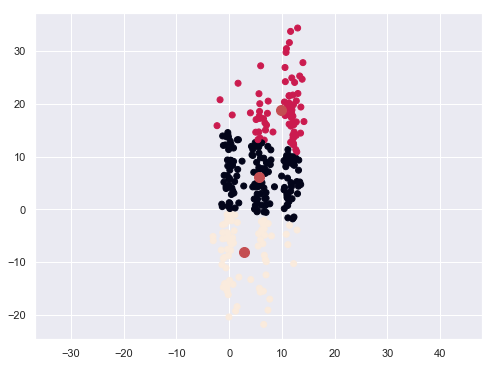

3
[[ 5.77534725  6.15739744]
 [ 9.79857892 19.00392322]
 [ 2.7900284  -8.08981283]]


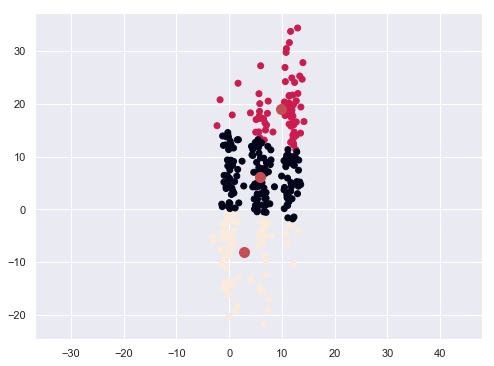

3
[[ 5.82070563  6.23709825]
 [ 9.81622364 19.19320584]
 [ 2.7900284  -8.08981283]]


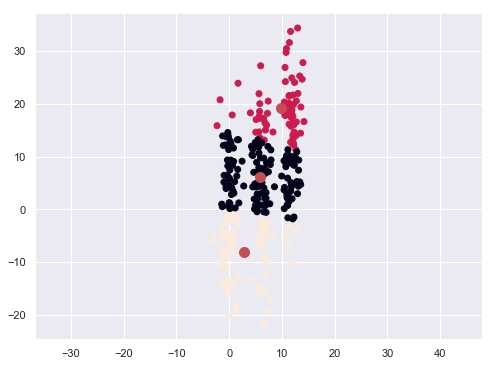

3
[[ 5.82070563  6.23709825]
 [ 9.81622364 19.19320584]
 [ 2.7900284  -8.08981283]]
Clusters converged in 8 iterations


In [11]:
last_closest = []
historia = []
print(centroids)
for i in range(max_iterations):
    closest = get_nearest_centroid_for_all_points(points,centroids)
    plt.figure(figsize=(8,6))
    plt.axes().set_aspect('equal', 'datalim')
    plt.scatter(points[:, 0], points[:, 1],c=closest)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)    
    plt.show()
    centroids = move_centroids(points, closest, centroids)
    print(centroids)
    if(np.array_equal(last_closest,closest)):
        print('Clusters converged in %d iterations' % i)
        break
    last_closest = closest

In [12]:
historia[0]

IndexError: list index out of range

In [ ]:
historia[1]

In [ ]:
historia[2]

In [ ]:
print(centroids)

In [ ]:
points = np.vstack(((np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]] , 100)),
                  (np.random.multivariate_normal([4, 4], [[1, 0], [0, 1]] , 100)),
                  (np.random.multivariate_normal([-4, -4], [[1, 0], [0, 1]] , 100))))
true_class_colors = np.hstack((np.ones(100),np.ones(100)*2,np.ones(100)*3))

plt.scatter(points[:, 0], points[:, 1],c=true_class_colors)
plt.axes().set_aspect('equal', 'datalim')
plt.title('Dataset that plays nicely with k-Means')

In [ ]:
centroids = get_random_centroids(points,k)
plt.scatter(points[:, 0], points[:, 1])
plt.axes().set_aspect('equal', 'datalim')
plt.title('Randomly selected centroids')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

In [ ]:
last_closest = []
for i in range(max_iterations):
    closest = get_nearest_centroid_for_all_points(points,centroids)
    plt.figure(figsize=(8,6))
    plt.axes().set_aspect('equal', 'datalim')
    plt.scatter(points[:, 0], points[:, 1],c=closest)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)    
    plt.title('The Easy Data')
    plt.show()
    centroids = move_centroids(points, closest, centroids)
    if(np.array_equal(last_closest,closest)):
        print('Clusters converged in %d iterations' % i)
        break
    last_closest = closest

In [ ]:
print(centroids)

In [ ]:
points = np.vstack(((np.random.multivariate_normal([0, 0], [[35, 0], [0, 35]] , 100)),
                  (np.random.multivariate_normal([4, 4], [[35, 0], [0, 35]] , 100)),
                  (np.random.multivariate_normal([-4, -4], [[35, 0], [0, 35]] , 100))))
true_class_colors = np.hstack((np.ones(100)*0,np.ones(100)*1,np.ones(100)*2))

plt.scatter(points[:, 0], points[:, 1],c=true_class_colors)
plt.axes().set_aspect('equal', 'datalim')
plt.title('Dataset that plays nicely with k-Means')

In [ ]:
centroids = get_random_centroids(points,k)
plt.scatter(points[:, 0], points[:, 1])
plt.axes().set_aspect('equal', 'datalim')
plt.title('Randomly selected centroids')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

In [ ]:
last_closest = []
for i in range(max_iterations):
    closest = get_nearest_centroid_for_all_points(points,centroids)
    plt.figure(figsize=(8,6))
    plt.axes().set_aspect('equal', 'datalim')
    plt.scatter(points[:, 0], points[:, 1],c=closest)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)    
    plt.title('The Easy Data')
    plt.show()
    centroids = move_centroids(points, closest, centroids)
    if(np.array_equal(last_closest,closest)):
        print('Clusters converged in %d iterations' % i)
        break
    last_closest = closest

# Solo hice el 3